In [3]:
 # Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"Assignment 2 Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
dataset = df.iloc[: , 1:]#drops a specific column 

In [15]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
dataset.shape

(200, 4)

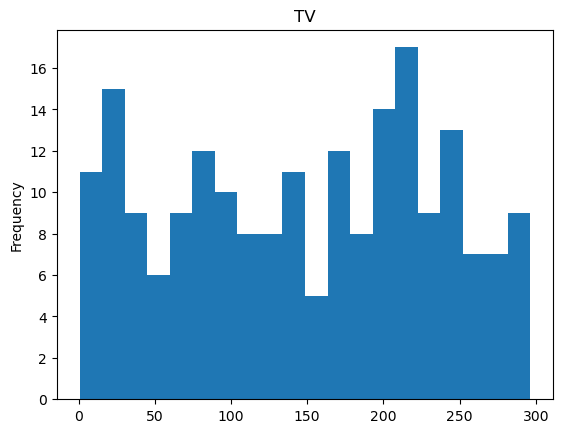

In [19]:
from matplotlib import pyplot as plt 
dataset['TV'].plot(kind='hist',bins=20,title='TV') #grouping 20 sampls to make 1 group (bin)
plt.show()

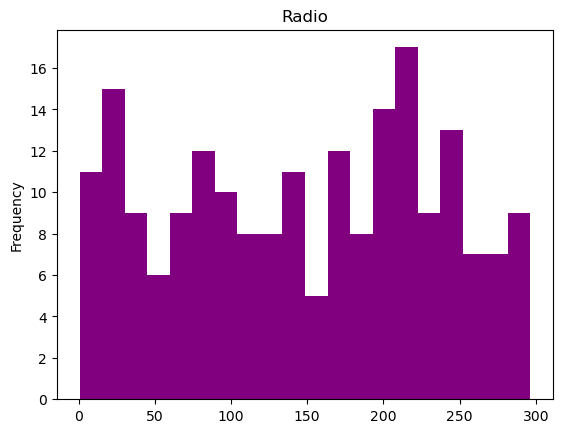

In [29]:
from matplotlib import pyplot as plt 
dataset['TV'].plot(kind='hist',bins=20,title='Radio',color='purple') #grouping 20 sampls to make 1 group (bin)
plt.show()

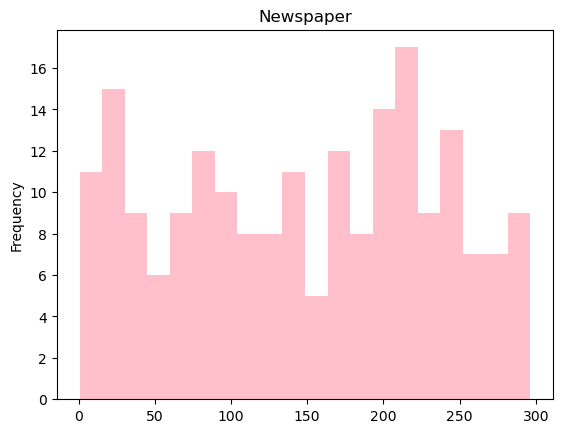

In [27]:
from matplotlib import pyplot as plt 
dataset['TV'].plot(kind='hist',bins=20,title='Newspaper',color= 'pink') #grouping 20 sampls to make 1 group (bin)
plt.show()#histograms are univariate graph it plots a single variable 

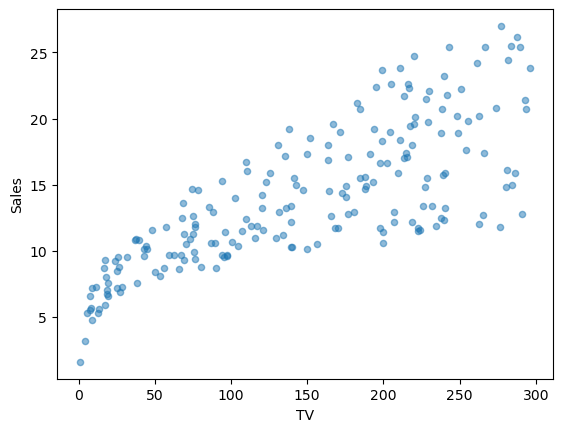

In [25]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter',x='TV',y='Sales',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

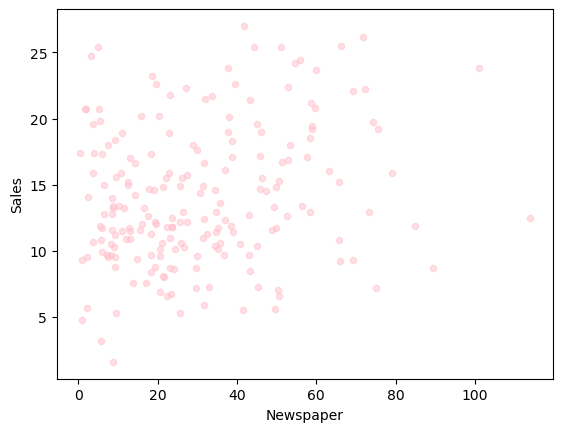

In [31]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter',x='Newspaper',y='Sales',alpha=0.5,color='pink')#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

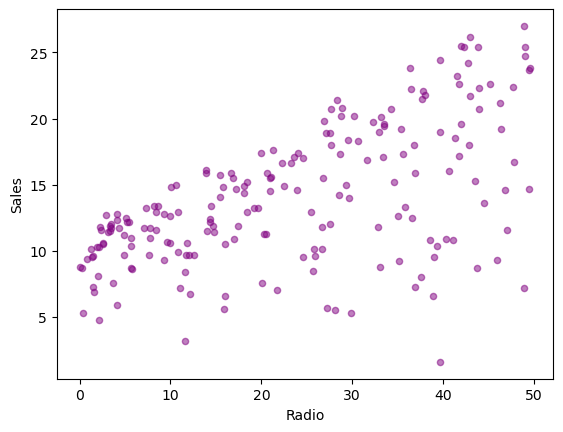

In [33]:
from matplotlib import pyplot as plt
dataset.plot(kind='scatter',x='Radio',y='Sales',alpha=0.5,color='purple')#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

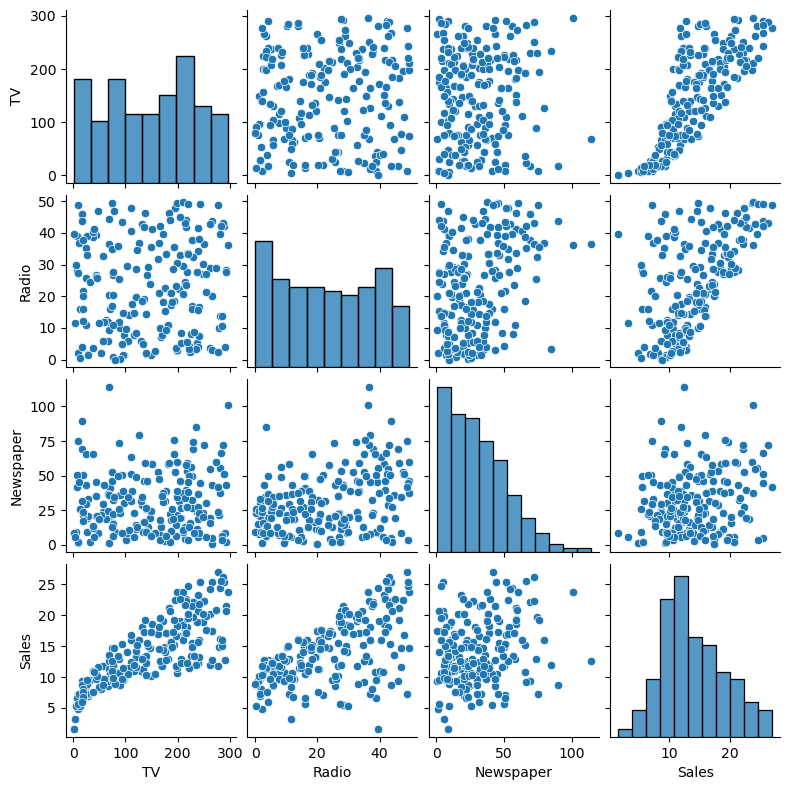

In [55]:


# Assuming 'dataset' is your DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot with a specified height
sns.pairplot(data = dataset, height=2)
plt.show()



In [61]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif) #vif uses r2 score to calculate 

In [73]:
X= dataset.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [78]:
x=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']

In [80]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


 After definin x and y we  split into train and test we didnt reshape cause one is in proper format 

In [84]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#42 is universal no. for random state


In [92]:
from sklearn.linear_model import LinearRegression

# Initialize the model
mlr = LinearRegression()

# Train the model
mlr.fit(X_train, y_train)


LinearRegression()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3.1740973539761037
R-squared Score: 0.899438024100912


In [98]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE value:{: .4f}".format(rmse))

RMSE value: 1.7816


In [102]:
print("Intercept:",mlr.intercept_)
print("Coeffients",mlr.coef_)
list(zip(x,mlr.coef_)) #zip used to make a list from the two and in Multiple linear reg we have 3 coeff but 1 intercept cause each column has a doff coeff

Intercept: 14.100000000000001
Coeffients [3.76419618 2.79230665 0.05597551]


[('TV', 3.7641961751469983),
 ('Radio', 2.7923066501984355),
 ('Newspaper', 0.05597551446265219)]

In [114]:
mlr_diff = pd.DataFrame({'Actual Value' : y_test,'Predicted value': y_pred})
mlr_diff.head()

,Actual Value,Predicted value
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373


In [124]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test,y_pred)
meanSqErr = metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('R squared :{: .2}'.format(r2*100))#maam had ritten format(mlr.score(x,y)*100))
print("Mean Absolute Error:", meanAbErr)
print("Mean Squared Error:",meanSqErr)
print('Root Mean Square Error:',rootMeanSqErr)


R squared : 9e+01
Mean Absolute Error: 1.46075671681176
Mean Squared Error: 3.1740973539761037
Root Mean Square Error: 1.78159966153345


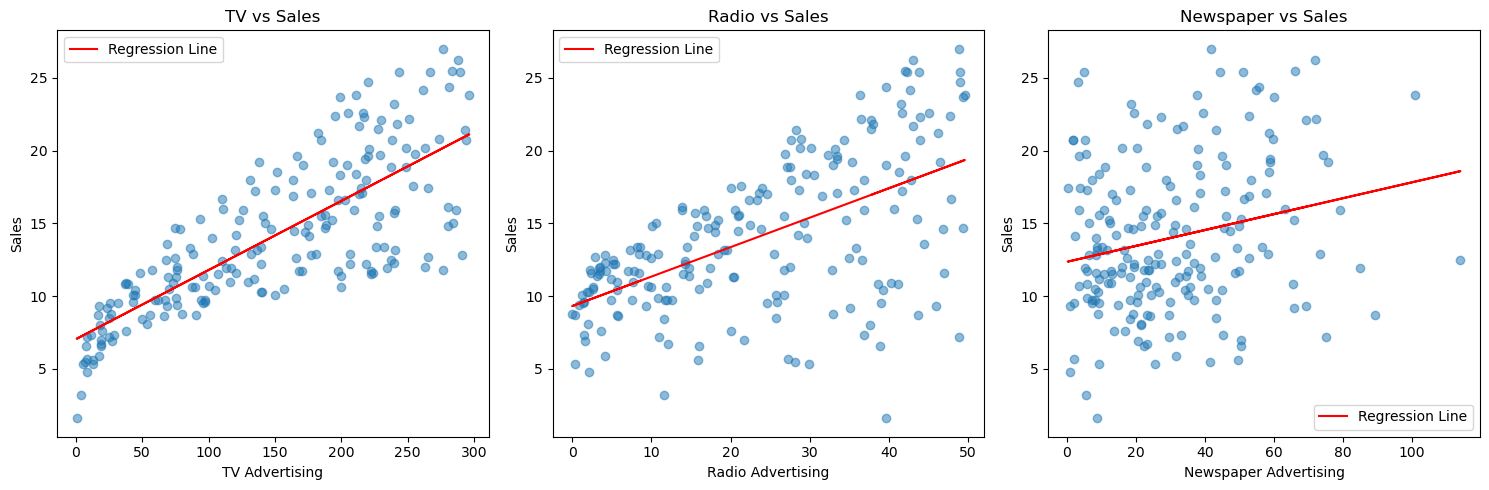

In [134]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
def plot_scatter_with_regression(ax, x_data, y_data, x_label, title):
    # Scatter plot
    ax.scatter(x_data, y_data, alpha=0.5)

    # Regression line
    slope, intercept = np.polyfit(x_data, y_data, 1)
    regression_line = slope * x_data + intercept
    ax.plot(x_data, regression_line, color='red', label='Regression Line')

    # Setting labels, title, and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel('Sales')
    ax.set_title(title)
    ax.legend()



# Plot scatter plots with regression lines
plot_scatter_with_regression(axes[0], dataset['TV'], dataset['Sales'], 'TV Advertising', 'TV vs Sales')
plot_scatter_with_regression(axes[1], dataset['Radio'], dataset['Sales'], 'Radio Advertising', 'Radio vs Sales')
plot_scatter_with_regression(axes[2], dataset['Newspaper'], dataset['Sales'], 'Newspaper Advertising', 'Newspaper vs Sales')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
